In [23]:
print("""
@File         : stochastics.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-02-16 00:20:34
@Email        : cuixuanstephen@gmail.com
@Description  : 推断统计学
""")


@File         : stochastics.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-02-16 00:20:34
@Email        : cuixuanstephen@gmail.com
@Description  : 推断统计学



从 Python 的角度介绍如下内容。
- **随机数** 一切都从（伪）随机数开始，它是所有模拟工作的基础；不管准随机数（例如，基于 Sobol 序列）在金融学中相当流行，但是伪随机数仍是基准。
- **模拟** 在金融学中，两种模拟工作特别重要：随机变量和随机过程的模拟。
- **估值** 估值有两种主要方式：欧式行权（特定日期）的衍生品估值和美式行权（在特定时期内）估值；另外还有用于百慕大行权（一组有限的特定日期）的估值工具。
- **风险测度** 模拟本身需要借助风险测度的计算，例如风险价值、信用风险价值和信用价值调整。

## 随机数

In [24]:
import math
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (8, 6)
%matplotlib inline

In [25]:
npr.seed(42)
np.set_printoptions(precision=2)

In [26]:
npr.rand(10)
# rand()函数返回区间[0，1)的随机数，随机数的个数由参数指定。

array([0.37, 0.95, 0.73, 0.6 , 0.16, 0.16, 0.06, 0.87, 0.6 , 0.71])

In [27]:
npr.rand(5, 5)

array([[0.02, 0.97, 0.83, 0.21, 0.18],
       [0.18, 0.3 , 0.52, 0.43, 0.29],
       [0.61, 0.14, 0.29, 0.37, 0.46],
       [0.79, 0.2 , 0.51, 0.59, 0.05],
       [0.61, 0.17, 0.07, 0.95, 0.97]])

In [28]:
a = 5.
b = 10.
npr.rand(10) * (b - a) + a

array([9.04, 6.52, 5.49, 8.42, 7.2 , 5.61, 7.48, 5.17, 9.55, 6.29])

In [29]:
npr.rand(5, 5) * (b - a) + a

array([[8.31, 6.56, 7.6 , 7.73, 5.92],
       [9.85, 8.88, 9.7 , 9.47, 7.99],
       [9.61, 5.44, 5.98, 5.23, 6.63],
       [6.94, 6.36, 9.14, 6.78, 6.4 ],
       [7.71, 5.7 , 9.01, 5.37, 9.93]])

|函数|参数|描述|
|---|---|---|
|`rand`|d0, d1, …, dn|指定组成的随机数|
|`randn`|d0, d1, …, dn|来自标准正态分布的一个（或者多个）样本|
|`randint`|low[, high, size]|从 low（含）到 high（不含）的随机整数|
|`random_integers`| low[, high, size]|low 和 high（含）之间的随机整数|
|`random_sample`|[size]|半开区间[0.0, 1.0)内的随机浮点数|
|`random`|[size]|半开区间[0.0, 1.0)内的随机浮点数|
|`ranf`|[size]|半开区间[0.0, 1.0)内的随机浮点数|
|`sample`|[size]|半开区间[0.0, 1.0)内的随机浮点数|
|`choice`|a[, size, replace, p] |给定一维数组中的随机样本|
|`bytes`|length|随机字节

In [30]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)
rn2 = npr.randint(0, 10, sample_size)
rn3 = npr.sample(size=sample_size)
a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size=sample_size)

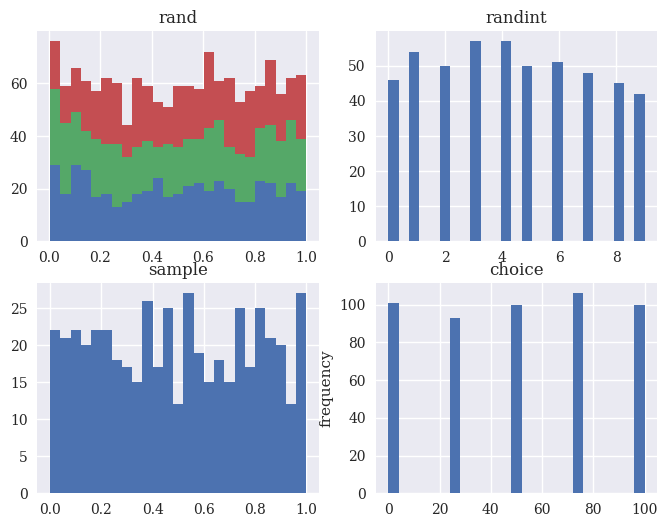

In [31]:
fig, axes = plt.subplots(2, 2)
axes[0][0].hist(rn1, stacked=True, bins=25)
axes[0][0].set_title('rand')
axes[0][1].hist(rn2, bins=25)
axes[0][1].set_title('randint')
axes[1][0].hist(rn3, bins=25)
axes[1][0].set_title('sample')
axes[1][1].set_ylabel('frequency')
axes[1][1].hist(rn4, bins=25)
axes[1][1].set_title('choice')
plt.show()

函数|参数|描述
--|--|--|
`beta`|a, b[, size]|[0,1]区间上的 $\beta$ 分布样本
`binomial`|n, p[, size]|二项分布样本
`chisquare`|df[, size]|卡方分布样本
`dirichlet`|alpha[, size]|狄利克雷分布样本
`exponential`|[scale, size]|指数分布样本
`f`|dfnum, dfden[, size]|F 分布样本
`gamma`|shape[, scale, size]|$\gamma$分布样本|
`geometric`|P[, size]|集合分布样本|
`gumbel`|[loc, scale, size]|冈贝尔分布样本|
`hypergeometric`|ngood, nbad, nsample[,size]|超几何分布样本|
`laplace`|[loc, scale, size]|拉普拉斯分布或者双指|数分布样本
`logistic`|[loc, scale, size]|分布样本
`Lognormal`|[mean, sigma, size]|对数正态分布样本
`logseries`|P[, size]|对数序列分布样本
`multinomial`|N, pvals[, size]|多项分布样本
`multivariate_normal`|mean, cov[, size]|多变量正态分布样本
`negative_binomial`|n, p[, size]|负二项式分布样本
`noncentral_chisquare`|df, nonc[, size]|非中心卡方分布样本
`noncentral_f`|dfnum, dfden, nonc[, size]|非中心 F 分布样本
`normal`|[loc, scale, size]|正态（高斯）分布样本
`pareto`|A[, size]|特定组成的p帕累托II或者洛克马思分布样本
`poisson`|[lam, size]|泊松分布样本
`power`|A[, size]|[0,1]区间内指数为正（a−1）|的幂次次分布样本
`rayleigh`|[scale, size]|瑞丽利分布样本
`standard_cauchy`|[size]|标准柯西分布（模式 0）样本
`standard_exponential`|[size]|标准指数分布样本
`standard_gamma`|shape[, size]|标准$\gamma$分布样本
`standard_normal`|[size]|标准正态分布（均值为 0，标准差为 1）样本
`standard_t`|df[, size]|学生的 t 分布样本（自由度为 df）
`triangular`|left, mode, right[, size]|三角分布样本
`uniform`|[low, high, size]|均匀分布样本
`vonmises`|mu, kappa[, size]|冯米塞斯分布样本
`wald`|mean, scale[, size]|瓦尔德（逆高斯）分布样本
`weibull`|a[, size]|威布尔分布样本
`zipf`|a[, size]|齐夫分布样本

虽然在金融学中使用（标准）正态分布受到了许多批评，但它们仍然是不可或缺的工具，在分析和数值应用中仍然是最广泛使用的分布类型之一。原因之一是许多金融模型直接依赖于正态分布或者对数正态分布。另一个原因是许多不直接依赖（对数）正态假设的金融模型可以离散化，从而使用正态分布进行近似模拟。

泊松分布用于模拟（罕见）外部事件的发生，例如某种金融工具价格暴涨或者外部冲击。

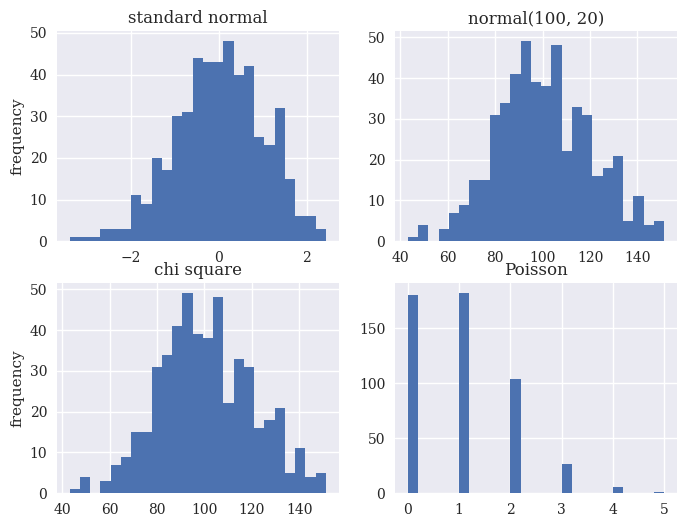

In [32]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)
rn2 = npr.normal(100, 20, sample_size)
rn3 = npr.chisquare(df=0.5, size=sample_size)
rn4 = npr.poisson(lam=1.0, size=sample_size)
fig, axes = plt.subplots(2, 2)
axes[0][0].hist(rn1, bins=25)
axes[0][0].set_title("standard normal")
axes[0][0].set_ylabel("frequency")
axes[0][1].hist(rn2, bins=25)
axes[0][1].set_title("normal(100, 20)")
axes[1][0].hist(rn2, bins=25)
axes[1][0].set_title("chi square")
axes[1][0].set_ylabel("frequency")
axes[1][1].hist(rn4, bins=25)
axes[1][1].set_title("Poisson")
plt.show()

## 模拟

蒙特卡洛模拟（MCS）是金融学中最重要的数值技术之一（在重要性和使用广泛程度上也许没有“之一”）。这主要是因为它是最灵活的数学表达式（如积分）求值方法，特别适合于金融衍生品的估值。但是，这种灵活性的代价是相对高的计算负担，估算一个值就可能需要数十万次甚至数百万次的复杂计算。

### 随机变量

以 Black-Scholes-Merton 设置模拟未来指数水平

\begin{equation}
    S_t=S_0\exp{\left((r-\frac{1}{2}\sigma^2)T+\sigma\sqrt{T}z\right)}
\end{equation}

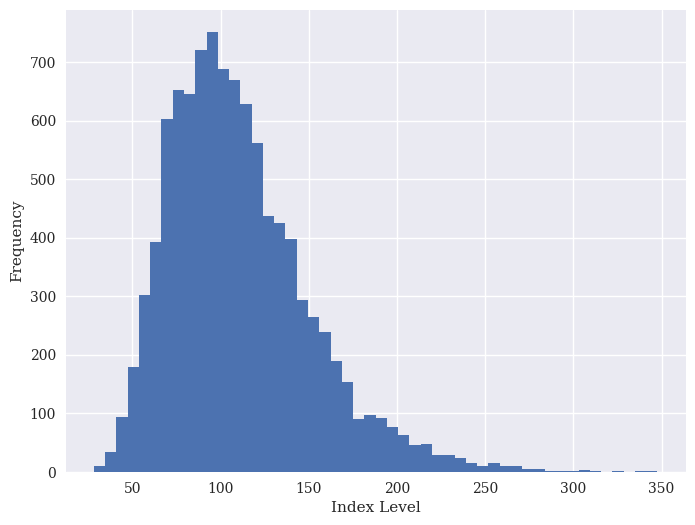

In [33]:
import math

S0 = 100
r = 0.05
sigma = 0.25
T = 2
I = 10000
ST1 = S0 * np.exp(
    (r - 0.5 * sigma**2) * T + sigma * math.sqrt(T) * npr.standard_normal(I)
)
fig = plt.figure()
plt.hist(ST1, bins=50)
plt.xlabel("Index Level")
plt.ylabel("Frequency")
plt.show()

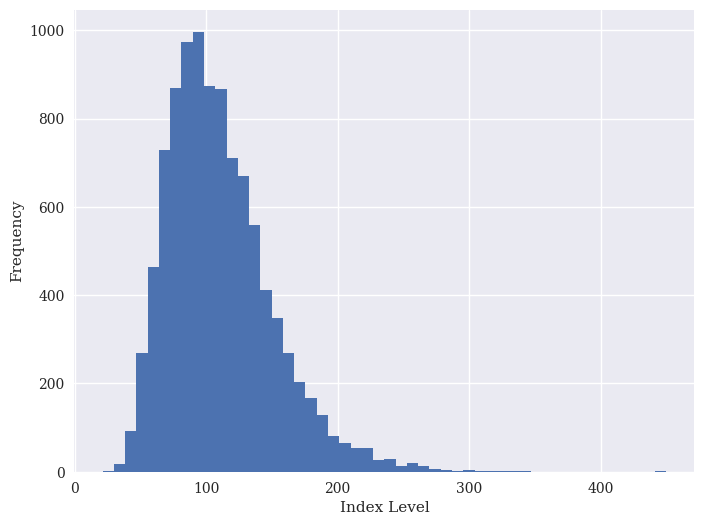

In [34]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma**2) * T, sigma * math.sqrt(T), size=I)
fig = plt.figure()
plt.hist(ST2, bins=50)
plt.xlabel("Index Level")
plt.ylabel("Frequency")
plt.show()

In [35]:
from help_functions import print_statistics

In [36]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         28.099         21.312
           max        347.697        449.966
          mean        110.572        110.604
           std         40.109         39.942
          skew          1.062          1.092
      kurtosis          1.802          2.182


### 随机过程

#### 几何布朗运动

在 Black-Scholes-Merton 设置中动态模拟指数水平：

\begin{equation}
    S_t=S_{t-\Delta t}\exp{\left((r-\frac{1}{2}\sigma^2)\Delta t+\sigma\sqrt{\Delta t}z_t\right)}
\end{equation}

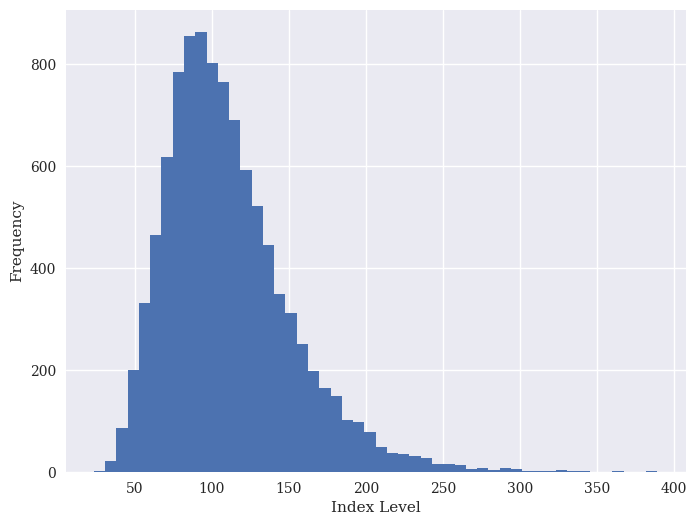

In [37]:
I = 10_000 # 模拟路径数量
M = 50 # 离散化所用的时间间隔数量
dt = T / M # 以年表示的时间间隔长度
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp(
        (r - 0.5 * sigma**2) * dt + sigma * math.sqrt(dt) * npr.standard_normal(I)
    )
fig = plt.figure()
plt.hist(S[-1], bins=50)
plt.xlabel("Index Level")
plt.ylabel("Frequency")
plt.show()

In [38]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         23.410         21.312
           max        389.266        449.966
          mean        110.579        110.604
           std         40.746         39.942
          skew          1.145          1.092
      kurtosis          2.266          2.182


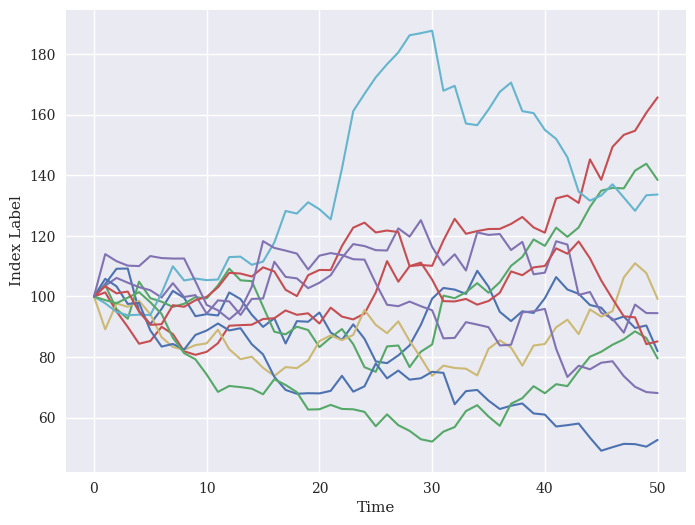

In [39]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('Time')
plt.ylabel('Index Label')
plt.show()

#### 平方根扩散

平方根扩散的随机微分方程：

\begin{equation}
    dx_t = k(\theta-x_t)d_t+\sigma\sqrt{x_t}dZ_t
\end{equation}

平方根扩散的欧拉离散化：
定义 $s=t-\Delta t$ 和 $x^{+}\equiv \max{(x, 0)}$
\begin{equation}
    \begin{aligned}
        \tilde{x}_t & =\tilde{x}_s+ k(\theta-\tilde{x}_s^{+})\Delta_t+\sigma\sqrt{\tilde{x}_s^{+}}\sqrt{\Delta t}z_t \\
        x_t         & =\tilde{x}_s^{+}                                                                                    \\
    \end{aligned}
\end{equation}

In [40]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1
I = 10_000
M = 50
dt = T / M
from help_functions import srd_euler

x1 = srd_euler(x0=x0, M=M, I=I, dt=dt, kappa=kappa, theta=theta, sigma=sigma)

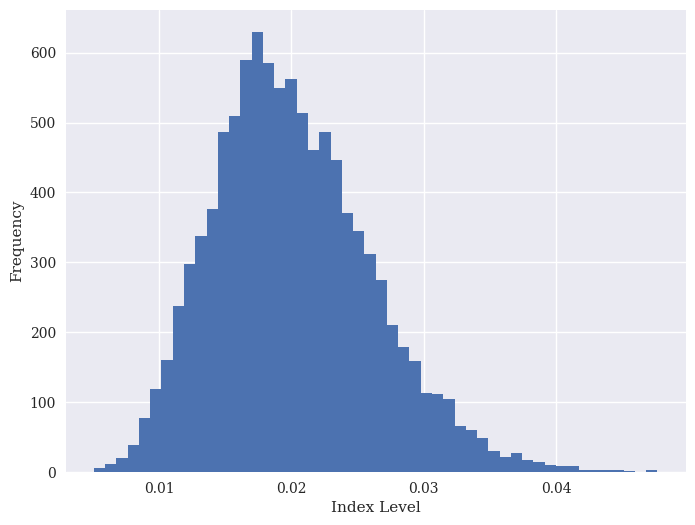

In [41]:
fig = plt.figure()
plt.hist(x1[-1], bins=50)
plt.xlabel("Index Level")
plt.ylabel("Frequency")
plt.show()

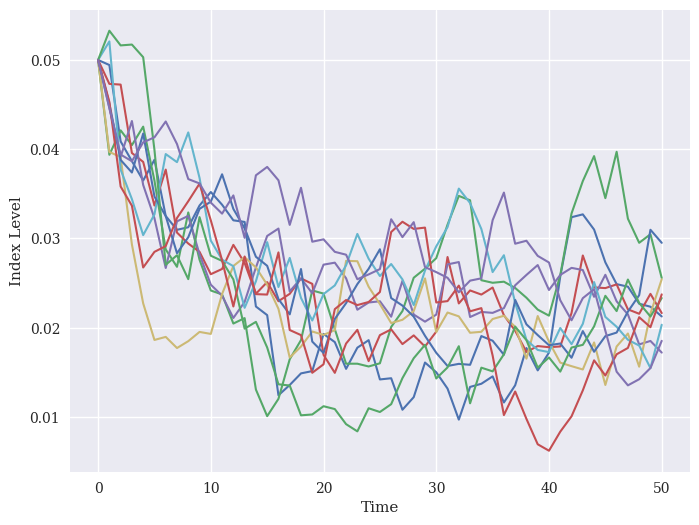

In [42]:
fig = plt.figure()
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel("Time")
plt.ylabel("Index Level")
plt.show()

展示了前 10 条模拟路径，说明得出的平均偏离值为负值（因为 $x_0 > \theta$）并收敛于 $\theta=0.02$

平方根扩散的精确离散化：

\begin{equation}
    x_t=\frac{\sigma^2(1-e^{-k\Delta t})}{4k}\chi_d^{'2}\left(\frac{4ke^{-k\Delta t}}{\sigma^2(1-e^{-k\Delta t)}}x_s\right)
\end{equation}

基于自由度 $df=\frac{4\theta k}{\sigma^2}$，非中心参数的卡方分布 $nc=\frac{4ke^{-k\Delta t}}{\sigma^2(1-e^{-k\Delta t})}x_s$

In [1]:
from simulation import Simulation
srd = Simulation(x0=0.05, M=50, I=10_000, T=2.0)

In [2]:
srd.srd_exact(theta=0.02, kappa=3.0, sigma=0.1)

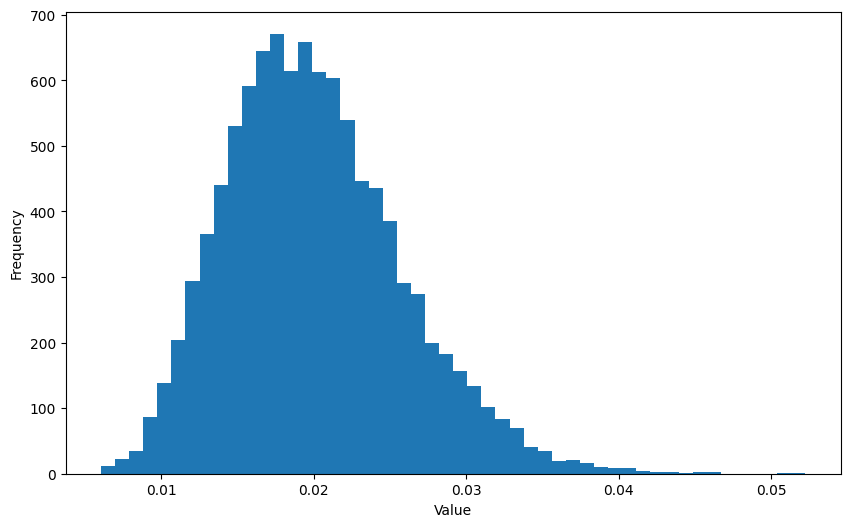

In [3]:
srd.plot()

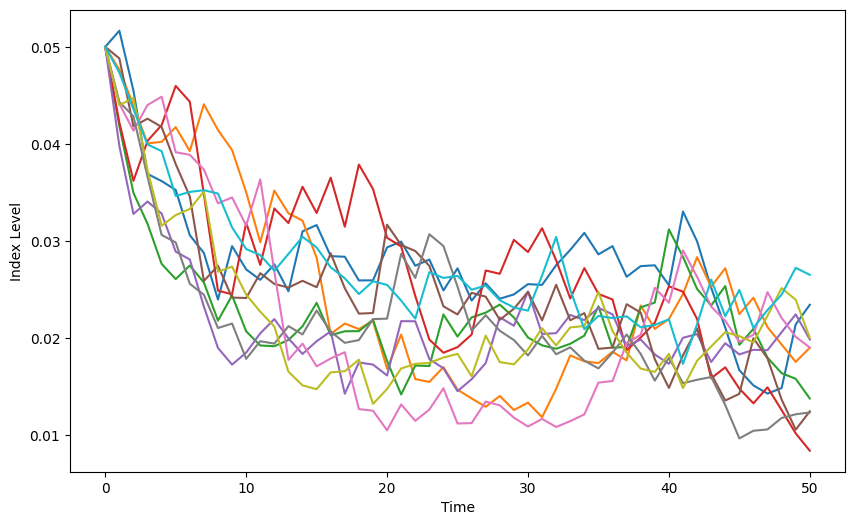

In [4]:
srd.plot_path()

In [5]:
euler = Simulation(x0=0.05, M=50, I=10_000, T=2.0)
euler.srd_euler(theta=0.02, kappa=3.0, sigma=0.1)

In [10]:
srd.print_info.print_statistics(srd.x[-1], euler.x[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.006          0.005
           max          0.052          0.049
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.596          0.535
      kurtosis          0.539          0.393


In [14]:
%timeit euler.srd_euler(theta=0.02, kappa=3, sigma=.01)

33.6 ms ± 7.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%timeit srd.srd_exact(theta=0.02, kappa=3, sigma=.01)

91.8 ms ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


在执行速度方面它们有较大的差异，这是因为从非中心卡方分布中采样的计算要求高于标准正态分布的采样。精确格式大约需要花费 2 倍的时间，而结果实际上和欧拉格式相同。

### 随机波动率

Black-Scholes-Merton 模型中重要的简化假设之一是恒定波动率。但是，波动率一般来说既不是恒定的、也不具有确定性，而是随机的。

Heston 随机波动率模型的随机微分方程

\begin{equation}
    \begin{aligned}
        dS_t        & = rS_tdt+\sqrt{v_t}S_tdZ_t^1                   \\
        dv_t        & = k_v(\theta_v-v_t)dt+\sigma_v\sqrt{v_t}dZ_t^2 \\
        dZ_t^1Z_t^2 & = \rho                                         \\
    \end{aligned}
\end{equation}

参数 $\rho$ 代表两个标准布朗运动 $Z_t^1$ 、$Z_t^2$ 之间的瞬时相关性。

为了说明两个随机过程之间的相关性，我们需要确定相关矩阵的柯列斯基分解：

In [3]:
S0 = 100.0
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)
cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

在开始模拟随机过程之前，我们为两个过程生成整组随机数，指数过程使用第 0 组，波动性过程使用第 1 组。对于以平方根扩散过程类型建模的波动性过程，我们使用欧拉格式，通过柯列斯基矩阵考虑相关性参数：

In [4]:
from simulation import Simulation
import numpy as np
s = Simulation(S0=100., M=50, I=10_000, T=1.0,
               theta=0.25, kappa=3.0, v0=0.1, r=0.05)

In [5]:
s.stochastic_volatility(cho_mat=cho_mat)

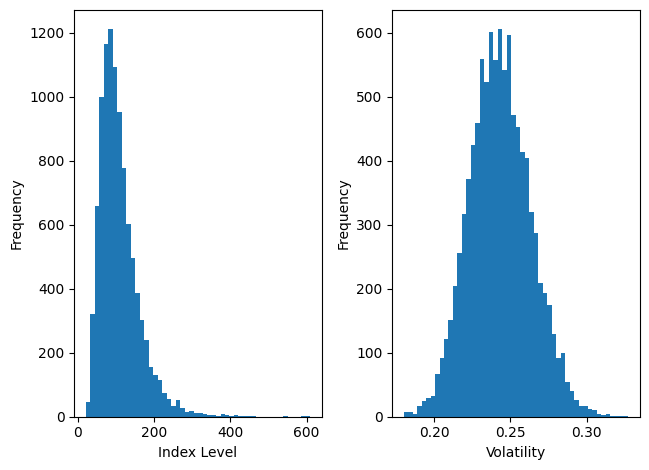

In [14]:
fig, axes = s.plot(s.S[-1], s.v[-1])
axes[0].set_xlabel('Index Level')
axes[0].set_ylabel('Frequency')
axes[1].set_xlabel('Volatility')
axes[1].set_ylabel('Frequency')
plt.show()

In [15]:
s.print_info.print_statistics(s.S[-1], s.v[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         20.244          0.180
           max        609.957          0.327
          mean        108.079          0.243
           std         52.143          0.020
          skew          1.796          0.161
      kurtosis          6.488          0.036


Text(0, 0.5, 'Volatility')

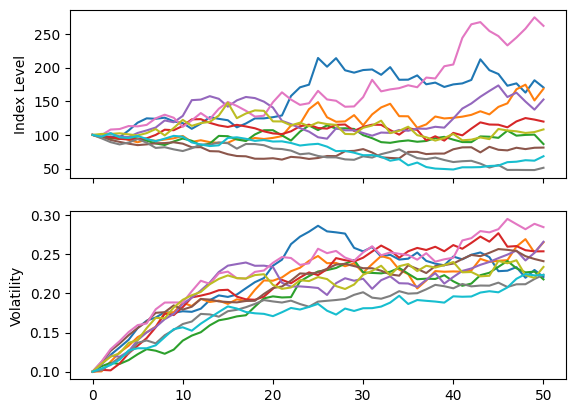

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(s.S[:, :10], lw=1.5)
ax1.set_ylabel('Index Level')
ax2.plot(s.v[:, :10], lw=1.5)
ax2.set_ylabel('Volatility')

#### 跳跃扩散